In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', rc={'figure.figsize':(21/2, 9/2), 'figure.dpi': 120})
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

In [2]:
df = pd.read_csv("./data/penguins_size.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## nan rows

จาก `df.info()` 
- จะเห็นว่า เพศ = NaN มี 8 row
- ค่าที่วัดมา = NaN มี 2 row

In [5]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [6]:
df.groupby(['sex', 'species']).count()

island  culmen_length_mm  culmen_depth_mm  \
sex    species                                                
.      Gentoo          1                 1                1   
FEMALE Adelie         73                73               73   
       Chinstrap      34                34               34   
       Gentoo         58                58               58   
MALE   Adelie         73                73               73   
       Chinstrap      34                34               34   
       Gentoo         61                61               61   

                  flipper_length_mm  body_mass_g  
sex    species                                    
.      Gentoo                     1            1  
FEMALE Adelie                    73           73  
       Chinstrap                 34           34  
       Gentoo                    58           58  
MALE   Adelie                    73           73  
       Chinstrap                 34           34  
       Gentoo                    61           61

## EDA

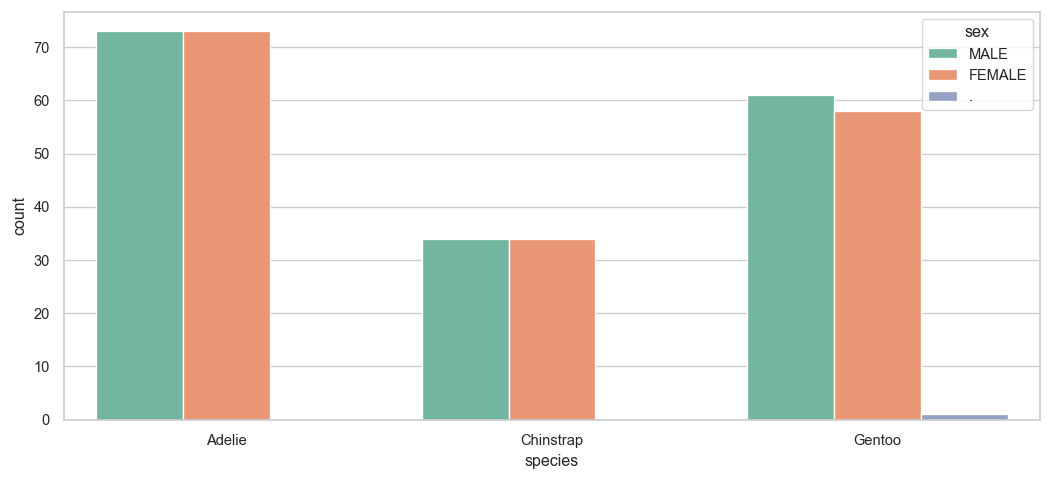

In [7]:
sns.countplot('species', data=df, hue='sex')
plt.show()

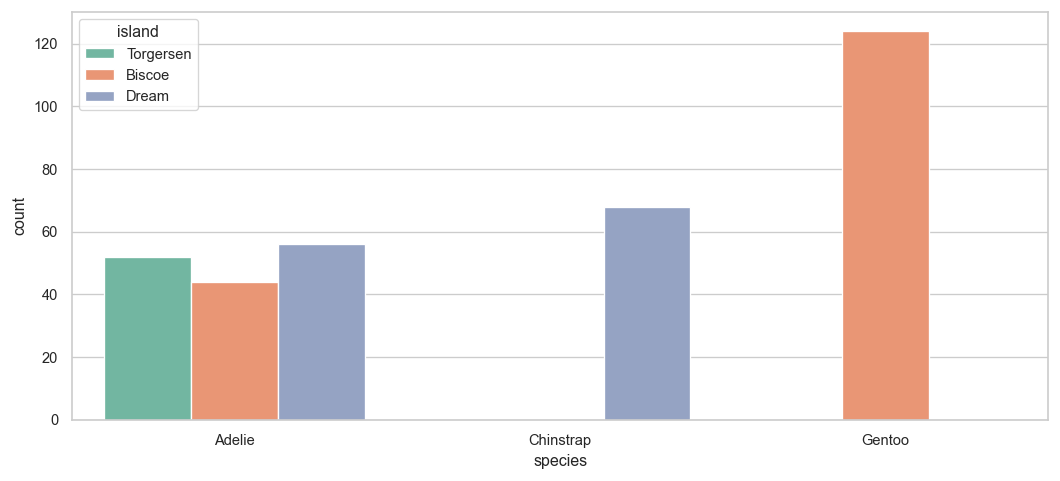

In [8]:
sns.countplot(x='species', data=df, hue='island')
plt.show()

> เพนกวินพันธุ์ Adelie อยู่ได้ทั้ง 3 island

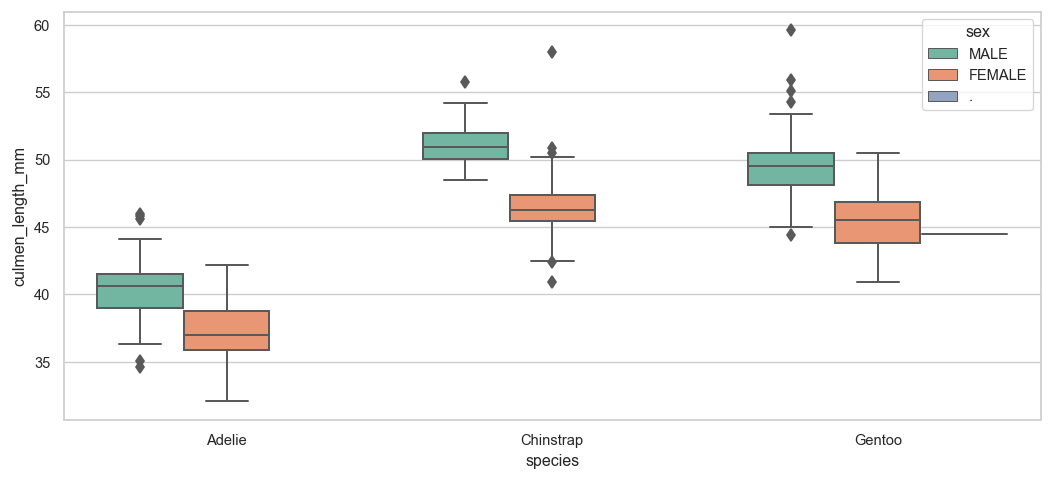

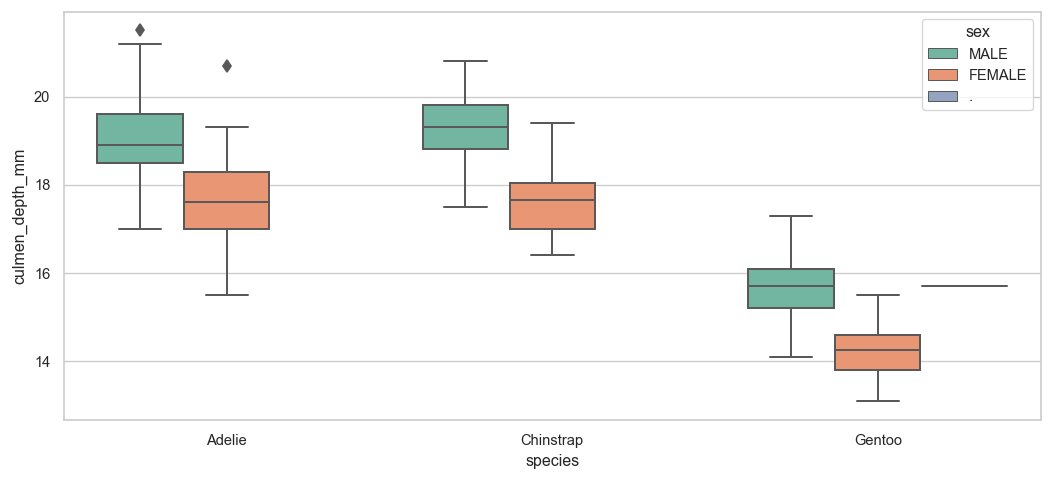

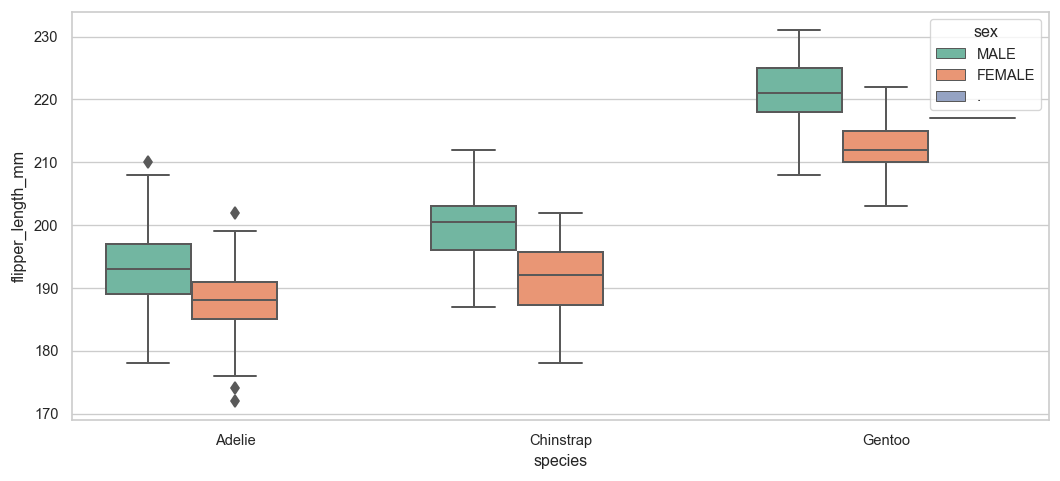

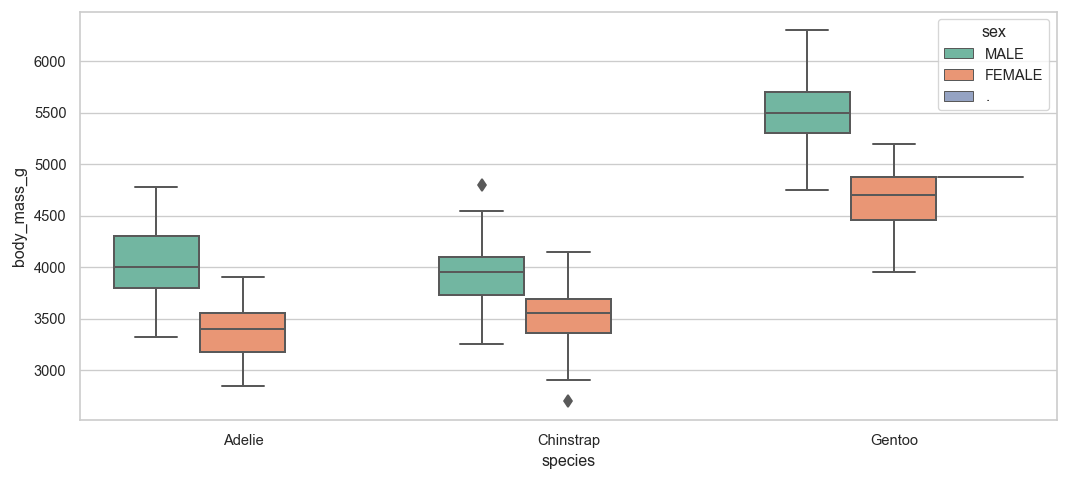

In [9]:
measument_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in measument_cols:
    sns.boxplot(x='species', y=col, data=df, hue='sex')
    plt.show()

## Clean Data

In [10]:
df_med = df.groupby(['sex', 'species']).median()
df_med

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
sex    species                                                           
.      Gentoo                44.50            15.70              217.0   
FEMALE Adelie                37.00            17.60              188.0   
       Chinstrap             46.30            17.65              192.0   
       Gentoo                45.50            14.25              212.0   
MALE   Adelie                40.60            18.90              193.0   
       Chinstrap             50.95            19.30              200.5   
       Gentoo                49.50            15.70              221.0   

                  body_mass_g  
sex    species                 
.      Gentoo          4875.0  
FEMALE Adelie          3400.0  
       Chinstrap       3550.0  
       Gentoo          4700.0  
MALE   Adelie          4000.0  
       Chinstrap       3950.0  
       Gentoo          5500.0

In [11]:
df.iloc[3]

species                 Adelie
island               Torgersen
culmen_length_mm           NaN
culmen_depth_mm            NaN
flipper_length_mm          NaN
body_mass_g                NaN
sex                        NaN
Name: 3, dtype: object

## 

fill ด้วย med, sex เนื่องจาก Adelie มีแต่ 2 เพศใกล้เคียงกัน -> สุ่ม

In [12]:
df.loc[3, 'culmen_length_mm'] = df_med.loc[('FEMALE', 'Adelie')]['culmen_length_mm']
df.loc[3, 'culmen_depth_mm'] = df_med.loc[('FEMALE', 'Adelie')]['culmen_depth_mm']
df.loc[3, 'flipper_length_mm'] = df_med.loc[('FEMALE', 'Adelie')]['flipper_length_mm']
df.loc[3, 'body_mass_g'] = df_med.loc[('FEMALE', 'Adelie')]['body_mass_g']
df.loc[3, 'sex'] = 'FEMALE'

In [13]:
df.iloc[3]

species                 Adelie
island               Torgersen
culmen_length_mm            37
culmen_depth_mm           17.6
flipper_length_mm          188
body_mass_g               3400
sex                     FEMALE
Name: 3, dtype: object

## 

fill sex Gentoo = Female เนื่องจากค่าที่วัด ใกล้เคียงกับ female มากกว่า

In [14]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [15]:
df.loc[[246, 286, 324, 339], 'sex'] = 'FEMALE'
df.loc[339, 'culmen_length_mm'] = df_med.loc[('FEMALE', 'Gentoo')]['culmen_length_mm']
df.loc[339, 'culmen_depth_mm'] = df_med.loc[('FEMALE', 'Gentoo')]['culmen_depth_mm']
df.loc[339, 'flipper_length_mm'] = df_med.loc[('FEMALE', 'Gentoo')]['flipper_length_mm']
df.loc[339, 'body_mass_g'] = df_med.loc[('FEMALE', 'Gentoo')]['body_mass_g']

In [16]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN


## 

fill sex Adelie 8, 10, 11, 47 = Female เนื่องจากค่าที่วัด ใกล้เคียงกับ female มากกว่า, 9 = Male

In [17]:
df.loc[[8, 10., 11, 47], 'sex'] = 'FEMALE' 

In [18]:
df.loc[[9], 'sex'] = 'MALE' 

In [19]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


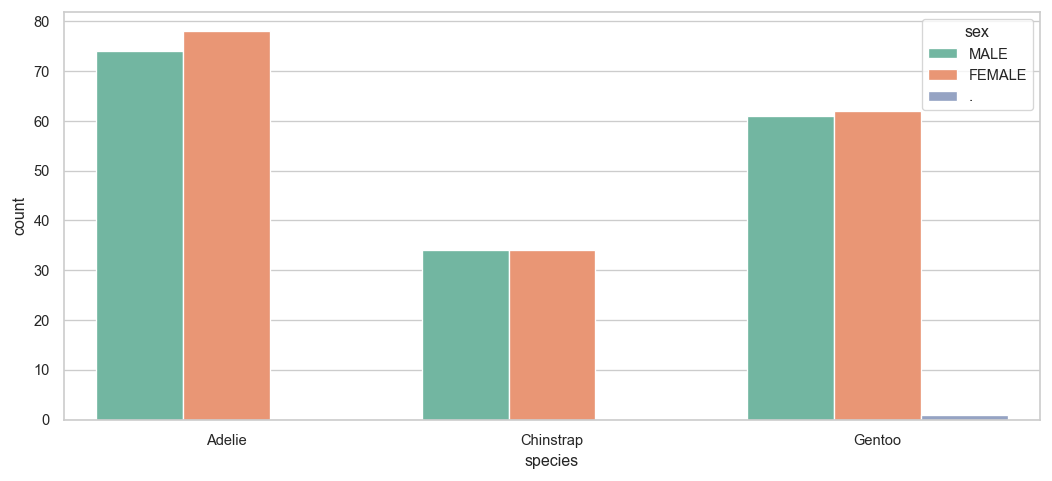

In [20]:
sns.countplot('species', data=df, hue='sex')
plt.show()

In [21]:
df[(df['sex'] != 'MALE') & (df['sex'] != 'FEMALE')]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [22]:
df.loc[336, 'sex'] = 'FEMALE'

## 
## EDA

EDA อีกรอบหลังจาก clean data

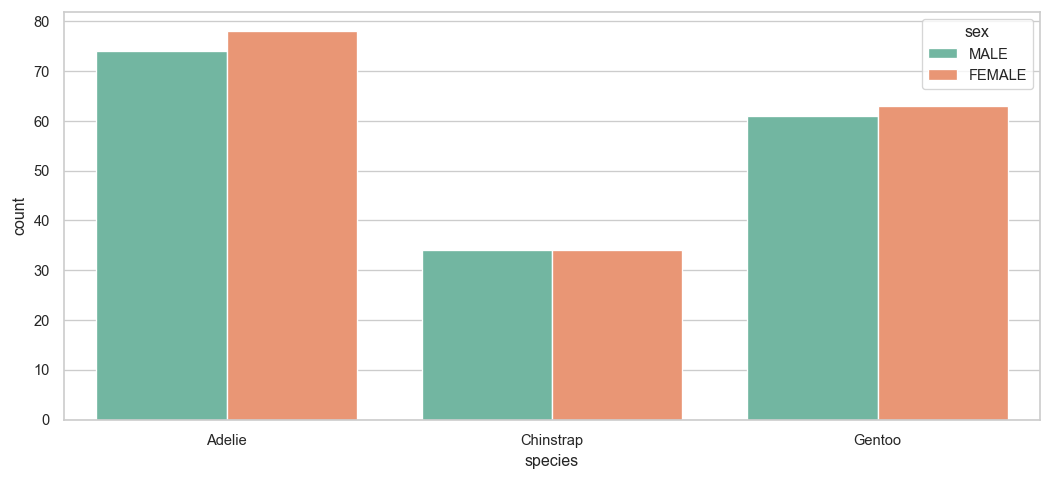

In [23]:
sns.countplot('species', data=df, hue='sex')
plt.show()

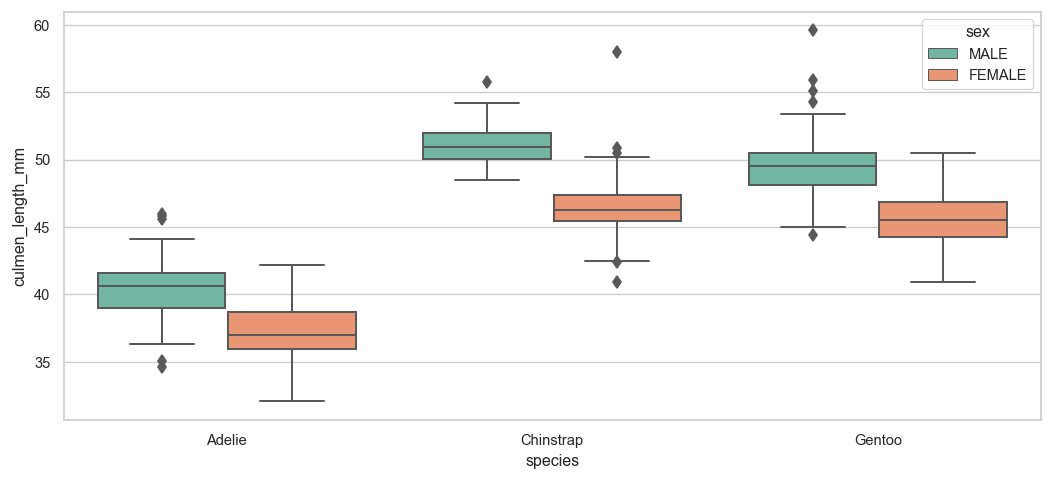

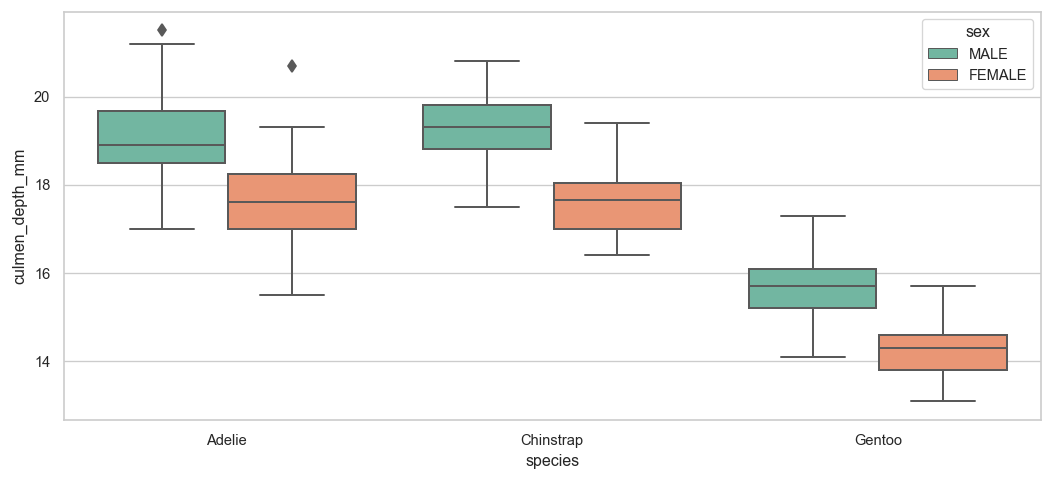

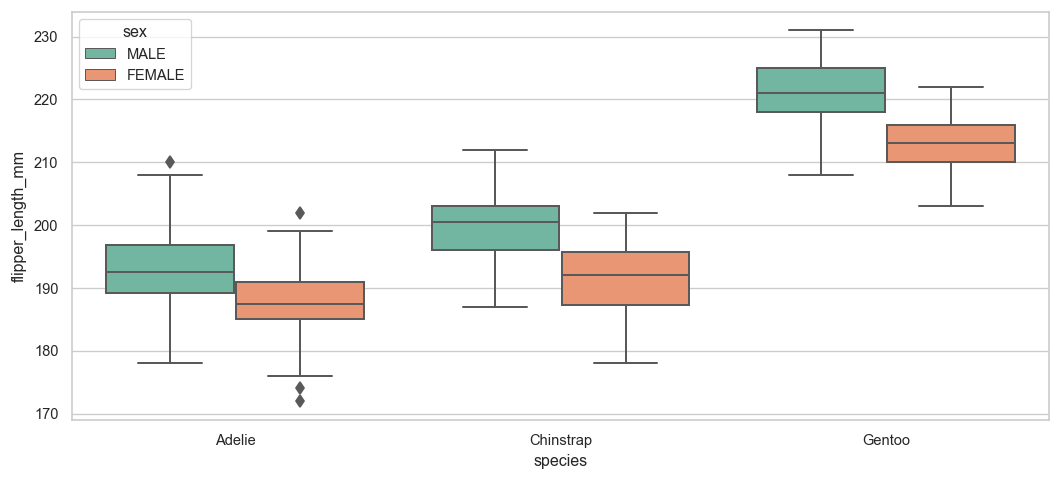

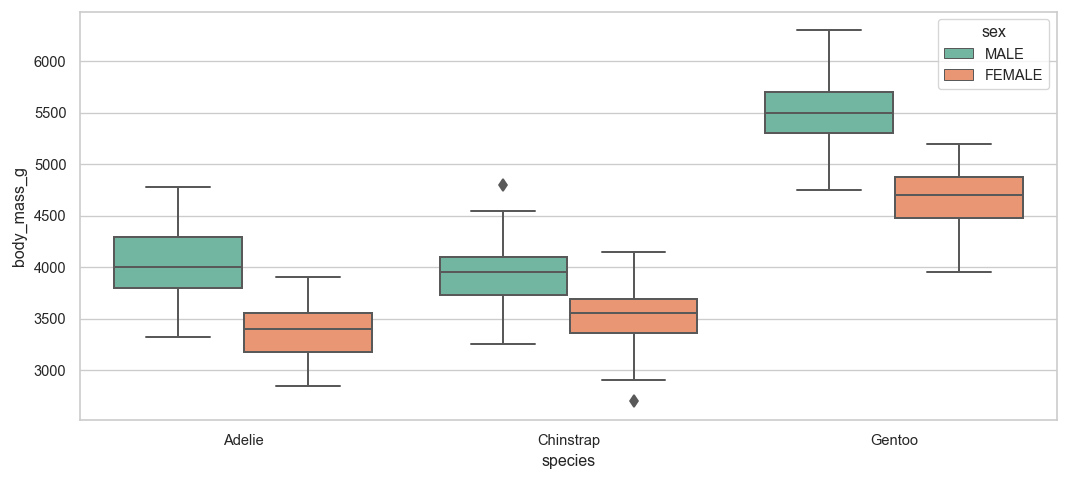

In [24]:
measument_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in measument_cols:
    sns.boxplot(x='species', y=col, data=df, hue='sex')
    plt.show()

### Save Cleaned file

In [25]:
df.to_csv('./data/penguins_size_clean.csv', index=False)

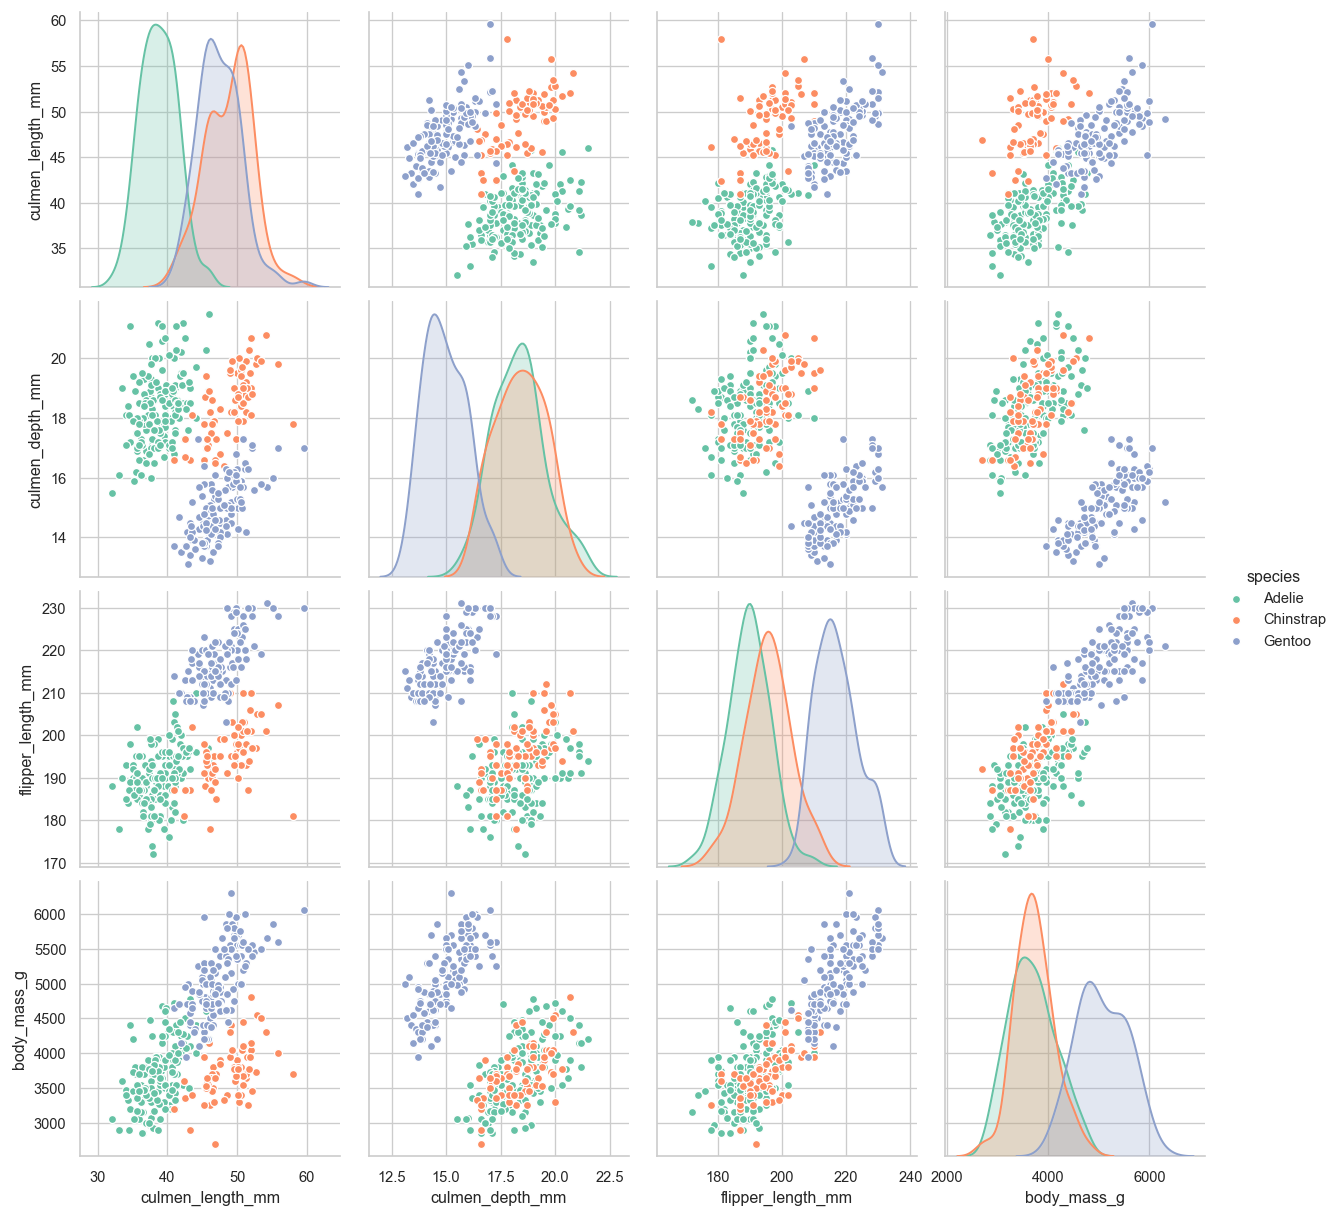

In [26]:
sns.pairplot(df, hue='species')
plt.show()

จาก pair plot จะเห็นว่า
- culment length / depth จะแยกเพนกวินแต่ละสปีชีส์ได้ชัดเจน